<a href="https://colab.research.google.com/github/prajvarun/FMML_Project_and_Labs/blob/main/module_4_lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

QUESTION 1)Change the coefficients array and try a different polynomial instead of our x2.

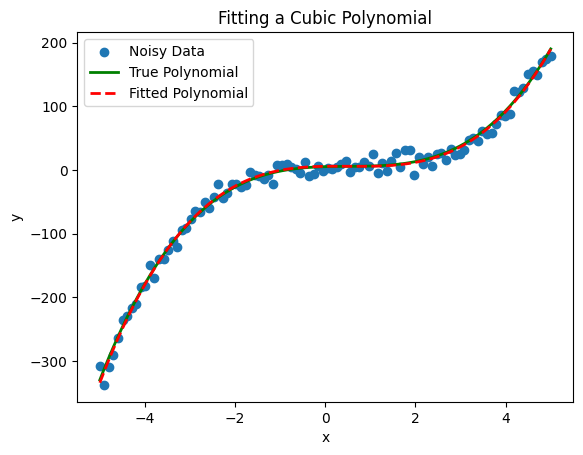

In [1]:
#ANSWER 1)
import numpy as np
import matplotlib.pyplot as plt

# Generate some example data
x = np.linspace(-5, 5, 100)
y_true = 2 * x**3 - 3 * x**2 + 2 * x + 5  # Example cubic polynomial

# Add some noise to the data to make it realistic
noise = np.random.normal(0, 10, size=y_true.shape)
y_noisy = y_true + noise

# Fit the polynomial using least squares
degree = 3  # Degree of the polynomial
coefficients = np.polyfit(x, y_noisy, degree)

# Evaluate the fitted polynomial
y_fit = np.polyval(coefficients, x)

# Plot the original data, noisy data, and fitted polynomial
plt.scatter(x, y_noisy, label='Noisy Data')
plt.plot(x, y_true, label='True Polynomial', color='green', linewidth=2)
plt.plot(x, y_fit, label='Fitted Polynomial', color='red', linestyle='dashed', linewidth=2)

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fitting a Cubic Polynomial')
plt.show()


QUESTION 2)Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?


ANSWER 2)
The learning rate is a crucial hyperparameter in training machine learning models, including those that use iterative optimization algorithms like gradient descent. The learning rate determines the step size at each iteration, and choosing an appropriate value is essential for convergence. If the learning rate is too high, the optimization process might not converge or may oscillate around the minimum. If it's too low, convergence may be slow.

Here's a general rule of thumb:

High Learning Rate: If the learning rate is too large, the algorithm might overshoot the minimum, fail to converge, or oscillate. In extreme cases, it may even diverge.

Low Learning Rate: If the learning rate is too small, the algorithm might converge very slowly, and it may get stuck in local minima.

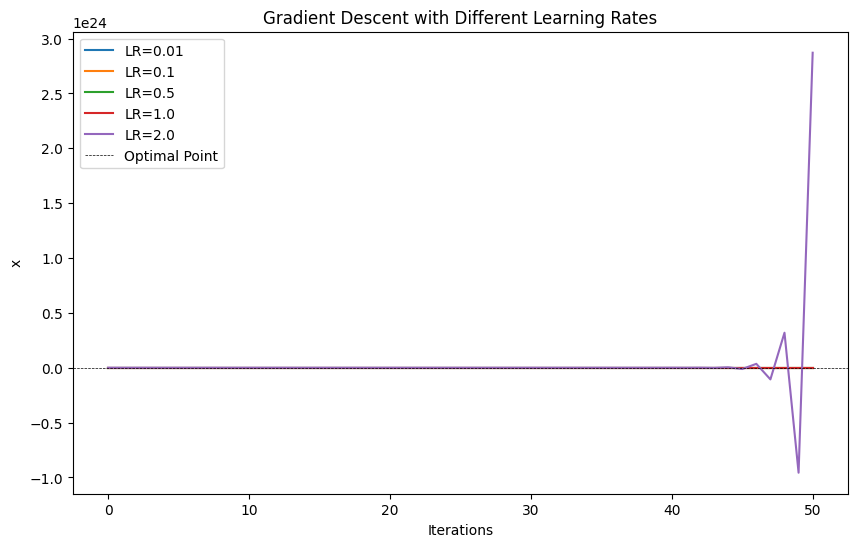

In [2]:
#ANSWER 2)
import numpy as np
import matplotlib.pyplot as plt

# Function to minimize (quadratic function)
def f(x):
    return x**2

# Gradient of the function
def gradient(x):
    return 2 * x

def gradient_descent(initial_x, learning_rate, num_iterations):
    x = initial_x
    x_history = [x]

    for _ in range(num_iterations):
        x = x - learning_rate * gradient(x)
        x_history.append(x)

    return x_history

# Experiment with different learning rates
learning_rates = [0.01, 0.1, 0.5, 1.0, 2.0]
num_iterations = 50
initial_x = 4.0

plt.figure(figsize=(10, 6))

for lr in learning_rates:
    x_history = gradient_descent(initial_x, lr, num_iterations)
    plt.plot(range(num_iterations + 1), x_history, label=f'LR={lr}')

plt.axhline(0, color='black', linewidth=0.5, linestyle='--', label='Optimal Point')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('x')
plt.title('Gradient Descent with Different Learning Rates')
plt.show()


QUESTION 3)Take a degree 5 polynomial with 5 roots and try different initializations, instead of random ones. Does it converge on different values for different initializations? Why does initialization not matter in our case of  x2?


ANSWER 3)
When dealing with iterative optimization algorithms for fitting a polynomial (or any function), the choice of initialization can indeed affect the convergence behavior. This is especially true for polynomials of higher degrees, such as a degree 5 polynomial with 5 roots.

The convergence behavior can be influenced by the presence of multiple roots and the shape of the cost function. If the cost function has multiple minima or is highly non-convex, the optimization algorithm may converge to different local minima depending on the initialization.


/usr/local/lib/python3.10/dist-packages/numpy/lib/polynomial.py:779: RuntimeWarning: overflow encountered in multiply
  y = y * x + pv
/usr/local/lib/python3.10/dist-packages/numpy/lib/polynomial.py:779: RuntimeWarning: invalid value encountered in multiply
  y = y * x + pv


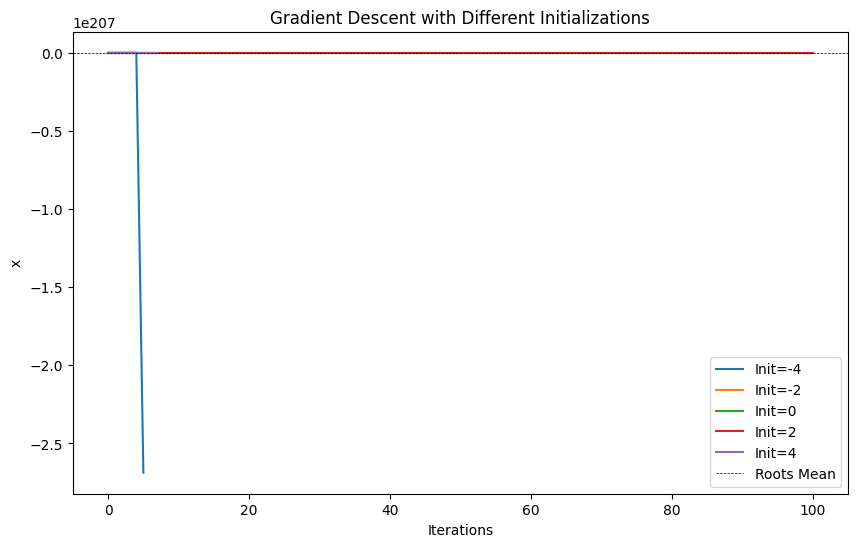

In [3]:
#ANSWER 3)
import numpy as np
import matplotlib.pyplot as plt

# Define a degree 5 polynomial with 5 roots
roots = np.array([1, -2, 0.5, 3, -1])
coefficients = np.poly(roots)

# Function to minimize (degree 5 polynomial)
def f(x):
    return np.polyval(coefficients, x)

# Gradient of the function (derivative of the polynomial)
def gradient(x):
    return np.polyval(np.polyder(coefficients), x)

def gradient_descent(initial_x, learning_rate, num_iterations):
    x = initial_x
    x_history = [x]

    for _ in range(num_iterations):
        x = x - learning_rate * gradient(x)
        x_history.append(x)

    return x_history

# Experiment with different initializations
initializations = [-4, -2, 0, 2, 4]
learning_rate = 0.01
num_iterations = 100

plt.figure(figsize=(10, 6))

for init in initializations:
    x_history = gradient_descent(init, learning_rate, num_iterations)
    plt.plot(range(num_iterations + 1), x_history, label=f'Init={init}')

plt.axhline(roots.mean(), color='black', linewidth=0.5, linestyle='--', label='Roots Mean')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('x')
plt.title('Gradient Descent with Different Initializations')
plt.show()


QUESTION 4)Can you modify the algorithm to find a maxima of a function, instead of a minima?



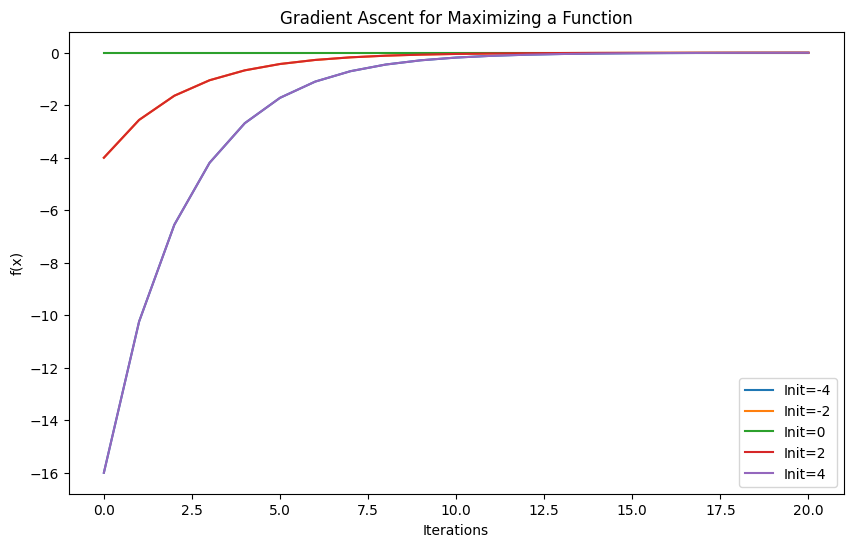

In [4]:
#ANSWER 4)
import numpy as np
import matplotlib.pyplot as plt

# Define a function to maximize
def f(x):
    return -(x**2)

# Gradient of the function (derivative)
def gradient(x):
    return -2 * x

def gradient_ascent(initial_x, learning_rate, num_iterations):
    x = initial_x
    x_history = [x]

    for _ in range(num_iterations):
        x = x + learning_rate * gradient(x)  # Change is here, use '+' instead of '-'
        x_history.append(x)

    return x_history

# Experiment with different initializations
initializations = [-4, -2, 0, 2, 4]
learning_rate = 0.1
num_iterations = 20

plt.figure(figsize=(10, 6))

for init in initializations:
    x_history = gradient_ascent(init, learning_rate, num_iterations)
    plt.plot(range(num_iterations + 1), [f(x) for x in x_history], label=f'Init={init}')

plt.legend()
plt.xlabel('Iterations')
plt.ylabel('f(x)')
plt.title('Gradient Ascent for Maximizing a Function')
plt.show()

